In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
data = {
    'Milk':    [1, 0, 1, 1, 0, 1],
    'Bread':   [1, 1, 1, 0, 1, 1],
    'Butter':  [0, 1, 1, 1, 1, 1],
    'Cheese':  [1, 0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)
print(df)

   Milk  Bread  Butter  Cheese
0     1      1       0       1
1     0      1       1       0
2     1      1       1       1
3     1      0       1       1
4     0      1       1       0
5     1      1       1       0


In [3]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print(frequent_itemsets)

    support         itemsets
0  0.666667           (Milk)
1  0.833333          (Bread)
2  0.833333         (Butter)
3  0.500000         (Cheese)
4  0.500000    (Milk, Bread)
5  0.500000   (Butter, Milk)
6  0.500000   (Milk, Cheese)
7  0.666667  (Butter, Bread)


C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [4]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print(rules)

  antecedents consequents   support  confidence  lift
0      (Milk)     (Bread)  0.500000        0.75  0.90
1     (Bread)      (Milk)  0.500000        0.60  0.90
2    (Butter)      (Milk)  0.500000        0.60  0.90
3      (Milk)    (Butter)  0.500000        0.75  0.90
4      (Milk)    (Cheese)  0.500000        0.75  1.50
5    (Cheese)      (Milk)  0.500000        1.00  1.50
6    (Butter)     (Bread)  0.666667        0.80  0.96
7     (Bread)    (Butter)  0.666667        0.80  0.96


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

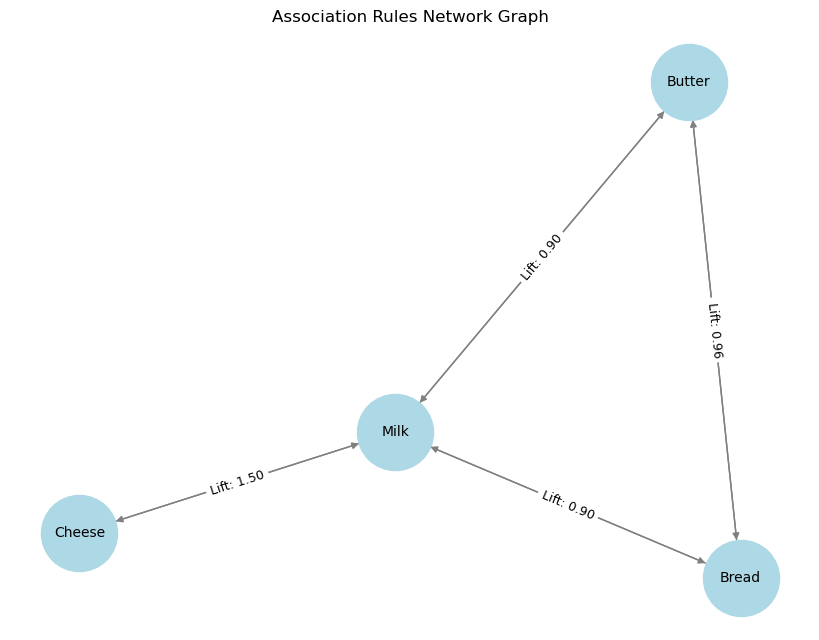

In [6]:
# Create a Network Graph for Association Rules
def draw_network_graph(rules):
    G = nx.DiGraph()

    # Add nodes and edges
    for _, rule in rules.iterrows():
        antecedent = list(rule['antecedents'])[0]  # Convert set to string
        consequent = list(rule['consequents'])[0]
        G.add_edge(antecedent, consequent, weight=rule['lift'])

    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Positioning

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    
    # Draw edge labels (Lift values)
    edge_labels = {(list(rule['antecedents'])[0], list(rule['consequents'])[0]): f"Lift: {rule['lift']:.2f}" 
                   for _, rule in rules.iterrows()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Association Rules Network Graph")
    plt.show()

# Call the function
draw_network_graph(rules)


C:\Users\al6436\AppData\Local\Temp\ipykernel_10144\1164877483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str), palette="viridis")


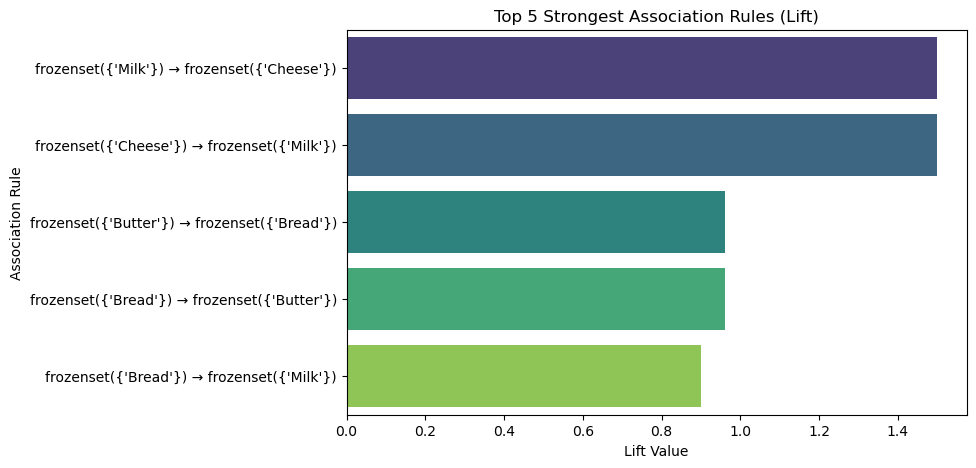

In [7]:
top_rules = rules.sort_values(by='lift', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str), palette="viridis")
plt.xlabel("Lift Value")
plt.ylabel("Association Rule")
plt.title("Top 5 Strongest Association Rules (Lift)")
plt.show()
